In [ ]:
! pip install gym==0.26.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from tqdm import tqdm

In [2]:
class BasicAgent:
    '''
    Базовый агент, от которого наследуются стратегии обучения
    '''

    # Наименование алгоритма
    ALGO_NAME = '---'

    def __init__(self, env, eps=0.1):
        # Среда
        self.env = env
        # Размерности Q-матрицы
        self.nA = env.action_space.n
        self.nS = env.observation_space.n
        #и сама матрица
        self.Q = np.zeros((self.nS, self.nA))
        # Значения коэффициентов
        # Порог выбора случайного действия
        self.eps=eps
        # Награды по эпизодам
        self.episodes_reward = []


    def print_q(self):
        print('Вывод Q-матрицы для алгоритма ', self.ALGO_NAME)
        print(self.Q)


    def get_state(self, state):
        '''
        Возвращает правильное начальное состояние
        '''
        if type(state) is tuple:
            # Если состояние вернулось с виде кортежа, то вернуть только номер состояния
            return state[0]
        else:
            return state


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        return np.argmax(self.Q[state])


    def make_action(self, state):
        '''
        Выбор действия агентом
        '''
        if np.random.uniform(0,1) < self.eps:

            # Если вероятность меньше eps
            # то выбирается случайное действие
            return self.env.action_space.sample()
        else:
            # иначе действие, соответствующее максимальному Q-значению
            return self.greedy(state)


    def draw_episodes_reward(self):
        # Построение графика наград по эпизодам
        fig, ax = plt.subplots(figsize = (15,10))
        y = self.episodes_reward
        x = list(range(1, len(y)+1))
        plt.plot(x, y, '-', linewidth=1, color='green')
        plt.title('Награды по эпизодам')
        plt.xlabel('Номер эпизода')
        plt.ylabel('Награда')
        plt.show()


    def learn():
        '''
        Реализация алгоритма обучения
        '''
        pass

In [3]:
class SARSA_Agent(BasicAgent):
    '''
    Реализация алгоритма SARSA
    '''
    # Наименование алгоритма
    ALGO_NAME = 'SARSA'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма SARSA
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Выбор действия
            action = self.make_action(state)

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Выполняем следующее действие
                next_action = self.make_action(next_state)

                # Правило обновления Q для SARSA
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                action = next_action
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

In [4]:
class QLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде
                action = self.make_action(state)

                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Правило обновления Q для SARSA (для сравнения)
                # self.Q[state][action] = self.Q[state][action] + self.lr * \
                #     (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Правило обновления для Q-обучения
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * np.max(self.Q[next_state]) - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

In [5]:
class DoubleQLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Double Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Двойное Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Вторая матрица
        self.Q2 = np.zeros((self.nS, self.nA))
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        temp_q = self.Q[state] + self.Q2[state]
        return np.argmax(temp_q)


    def print_q(self):
        print('Вывод Q-матриц для алгоритма ', self.ALGO_NAME)
        print('Q1')
        print(self.Q)
        print('Q2')
        print(self.Q2)


    def learn(self):
        '''
        Обучение на основе алгоритма Double Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде
                action = self.make_action(state)

                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                if np.random.rand() < 0.5:
                    # Обновление первой таблицы
                    self.Q[state][action] = self.Q[state][action] + self.lr * \
                        (rew + self.gamma * self.Q2[next_state][np.argmax(self.Q[next_state])] - self.Q[state][action])
                else:
                    # Обновление второй таблицы
                    self.Q2[state][action] = self.Q2[state][action] + self.lr * \
                        (rew + self.gamma * self.Q[next_state][np.argmax(self.Q2[next_state])] - self.Q2[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

In [13]:
def play_agent(agent):
    '''
    Проигрывание сессии для обученного агента
    '''
    env2 = gym.make('CliffWalking-v0',render_mode='human')
    state = env2.reset()[0]
    done = False
    while not done:
        action = agent.greedy(state)
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True


def run_sarsa():
    env = gym.make('CliffWalking-v0')
    agent = SARSA_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def run_q_learning():
    env = gym.make('CliffWalking-v0')
    agent = QLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def run_double_q_learning():
    env = gym.make('CliffWalking-v0')
    agent = DoubleQLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)

  0%|          | 0/20000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
100%|██████████| 20000/20000 [00:11<00:00, 1775.98it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ -13.25496719  -12.52083762  -14.11869936  -13.27336671]
 [ -12.47200201  -11.74421759  -13.29628466  -13.44654824]
 [ -11.7163399   -11.00009482  -12.52625476  -12.81525864]
 [ -10.87897448  -10.06332136  -11.85350754  -11.85318093]
 [ -10.10833154   -9.23044865  -11.06378807  -11.09773136]
 [  -9.27040465   -8.38353428  -10.16221877  -10.26210825]
 [  -8.37573451   -7.51394648   -9.49507546   -9.47423764]
 [  -7.54095672   -6.62552505   -8.52119064   -8.63489456]
 [  -6.69570729   -5.72308682   -7.60661526   -7.74015709]
 [  -5.79483144   -4.80921512   -5.51590429   -6.87482452]
 [  -4.86056676   -4.164817     -3.88277669   -5.94756657]
 [  -3.91250851   -3.94339713   -2.98175951   -5.04411009]
 [ -13.26510059  -13.61177447  -14.87701759  -13.98719975]
 [ -12.43849069  -14.96355681  -19.97454586  -16.71526948]
 [ -11.68001485  -15.85166393  -25.7849127   -18.58670679]
 [ -10.9375775   -14.42727888  -24.57801307  -18.0887485 ]
 [ -10.06949071  -1

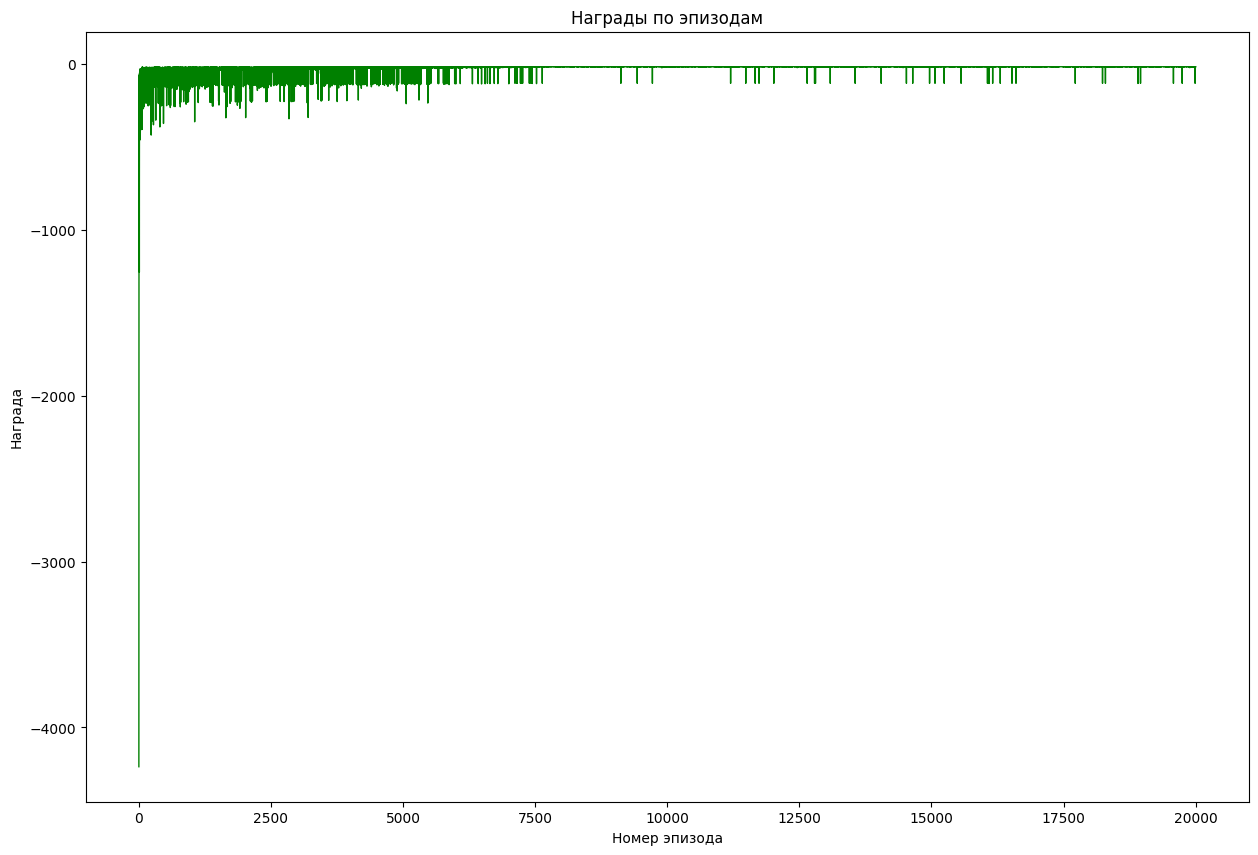

In [10]:
run_sarsa()

100%|██████████| 20000/20000 [00:15<00:00, 1314.67it/s]


Вывод Q-матрицы для алгоритма  Q-обучение
[[ -12.48686328  -12.30100205  -12.30202747  -12.50224859]
 [ -12.05891704  -11.54773296  -11.547629    -12.5320434 ]
 [ -11.42722268  -10.76410293  -10.76410254  -11.96686123]
 [ -10.70093544   -9.96342497   -9.96342448  -11.33501737]
 [  -9.89273797   -9.1463587    -9.14635874  -10.57583766]
 [  -9.13343082   -8.31261175   -8.31261177   -9.91314512]
 [  -8.30346131   -7.46184884   -7.46184884   -9.13689331]
 [  -7.44992111   -6.59372333   -6.59372333   -8.30059447]
 [  -6.57747167   -5.70788096   -5.70788096   -7.45110479]
 [  -5.68091994   -4.80396016   -4.80396016   -6.53299042]
 [  -4.7934482    -3.881592     -3.881592     -5.64864218]
 [  -3.86742591   -3.87659473   -2.9404       -4.75007091]
 [ -13.03618829  -11.54888054  -11.54888054  -12.31781246]
 [ -12.31410921  -10.76416381  -10.76416381  -12.31789047]
 [ -11.54867483   -9.96343246   -9.96343246  -11.54887856]
 [ -10.76412001   -9.14635966   -9.14635966  -10.76416379]
 [  -9.9634281

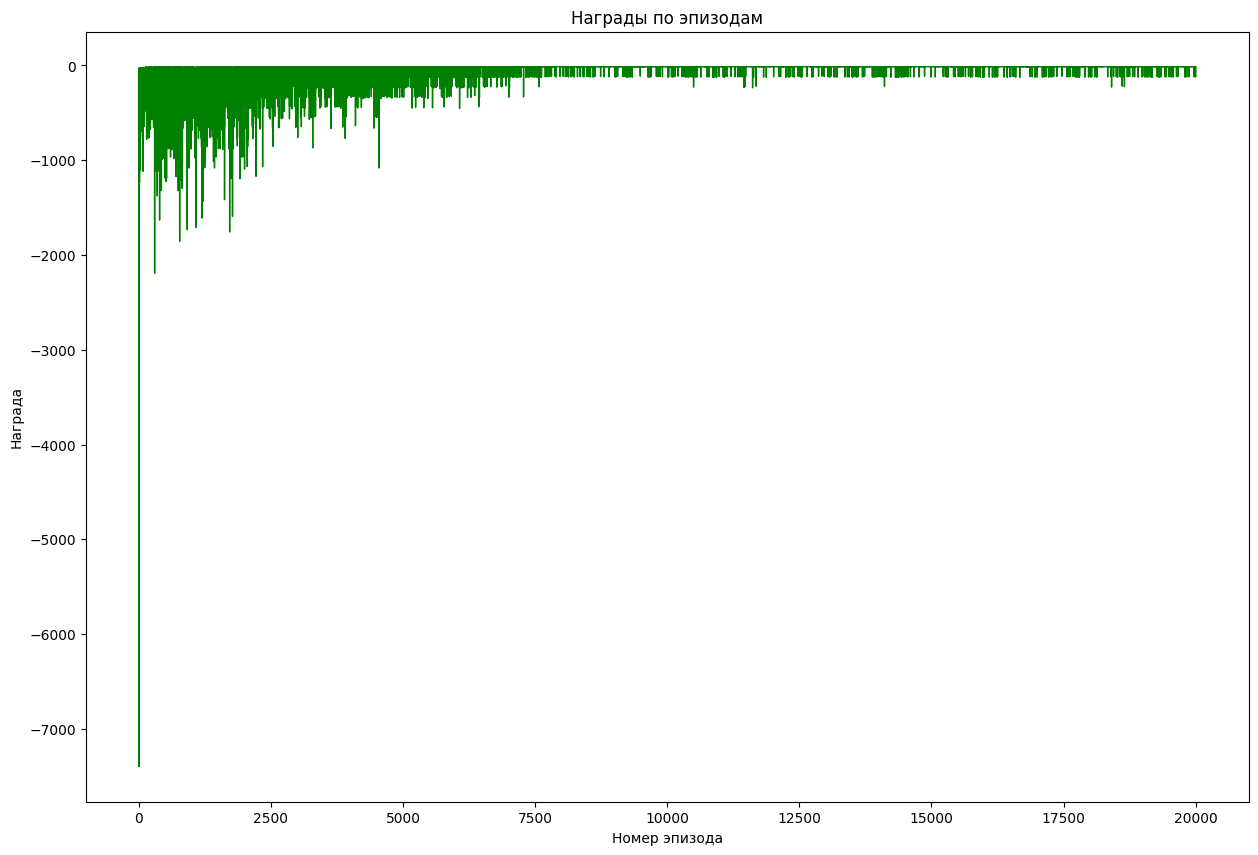

In [11]:
run_q_learning()

100%|██████████| 20000/20000 [00:13<00:00, 1470.34it/s]


Вывод Q-матриц для алгоритма  Двойное Q-обучение
Q1
[[ -15.31191744  -15.11970736  -12.34223813  -15.42577695]
 [ -13.56315438  -15.21849546  -11.57737898  -15.03828783]
 [ -14.46190067  -13.58003556  -10.78193703  -13.92778682]
 [ -13.03266774  -13.62084438  -10.0142253   -13.93621918]
 [ -13.42305875  -11.08947855   -9.19490153  -10.96216611]
 [  -9.92704094  -10.39068683   -8.44297547  -11.00873897]
 [ -10.07466308   -8.61153486   -7.46607295   -9.26185523]
 [  -8.30932942   -6.60416283   -8.7245487    -9.23133259]
 [  -7.10492822   -7.91778306   -5.70806107   -7.92550652]
 [  -6.63918439   -4.8131028    -3.64830623   -5.94420997]
 [  -4.42000317   -3.8819198    -4.58043044   -6.76386324]
 [  -3.73465676   -3.85183684   -2.94040002   -4.37930206]
 [ -13.12374638  -11.55579588  -11.54888054  -12.33648089]
 [ -12.42587965  -10.77401347  -10.76416381  -12.32533342]
 [ -11.7686001   -10.06804402   -9.96343246  -11.56432803]
 [ -10.89326108   -9.17152616   -9.14635966  -10.77545944]
 [ -

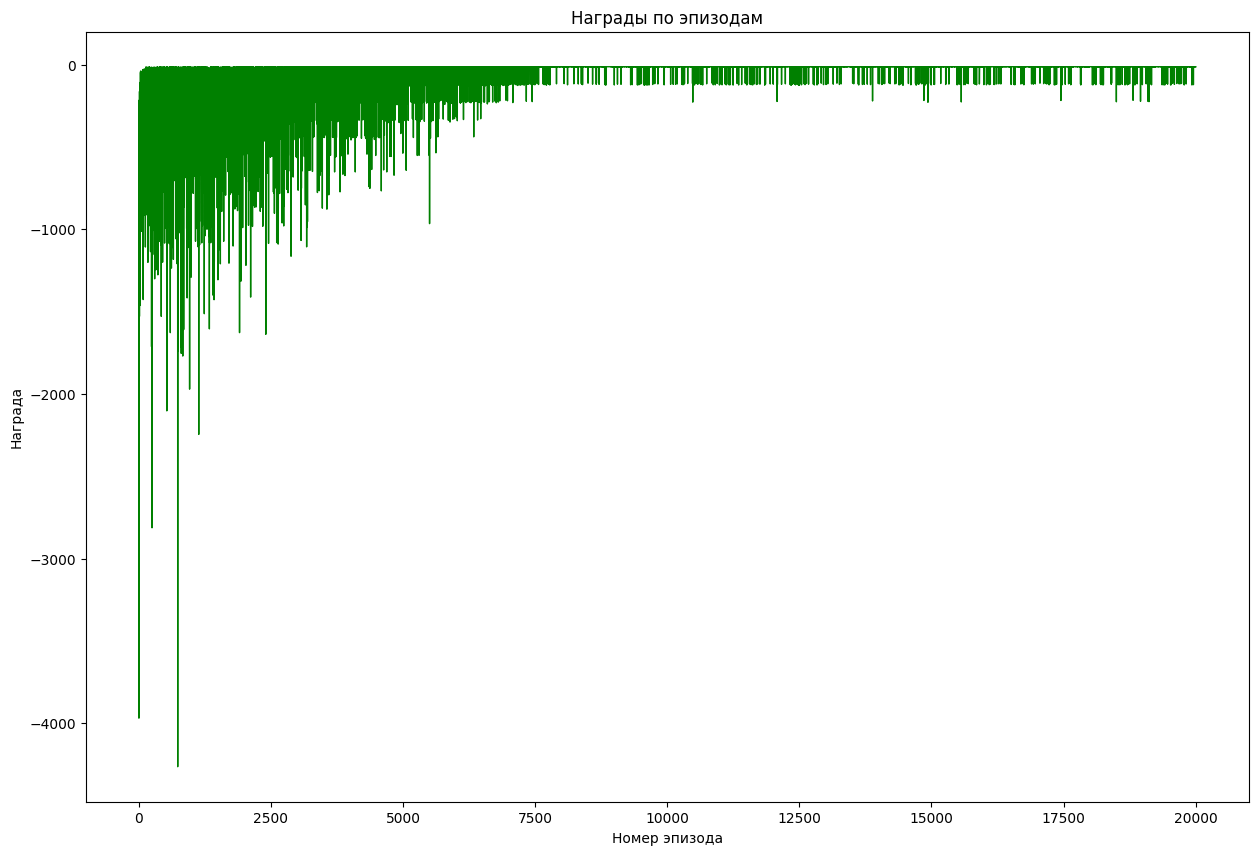

In [14]:
run_double_q_learning()